# Advanced Workshop: NLP and ML
## Classifying movies as spooky or not

## Problem
- Here we will try to use a transformer to classify movies as spooky or not
- A transformer is a revolutionary type of machine learning model used for nlp and also time series tasks
    - You may be familiar with ChatGPT which is built with transformers

## Machine Learning & Deep Learning
> Before talking about transformers lets look at machine learning and deep learning
- Machine learning is the process of teaching a model too solve problems given data
- Deep learning is a subset of machine learning which uses many layers, and uses artificial neural networks as building blocks
    - Ex: CNNs, LSTM, RNN, GNN, Transformer
    
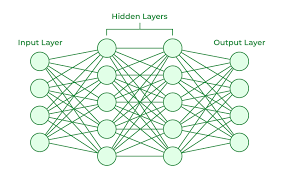

## Transformers
- Transformers have revolutionized the field of nlp. These models are able to keep track of long term dependencies much better than other models. This is allows for these models to handle large texts or sequences of data much better.

### General Architecture
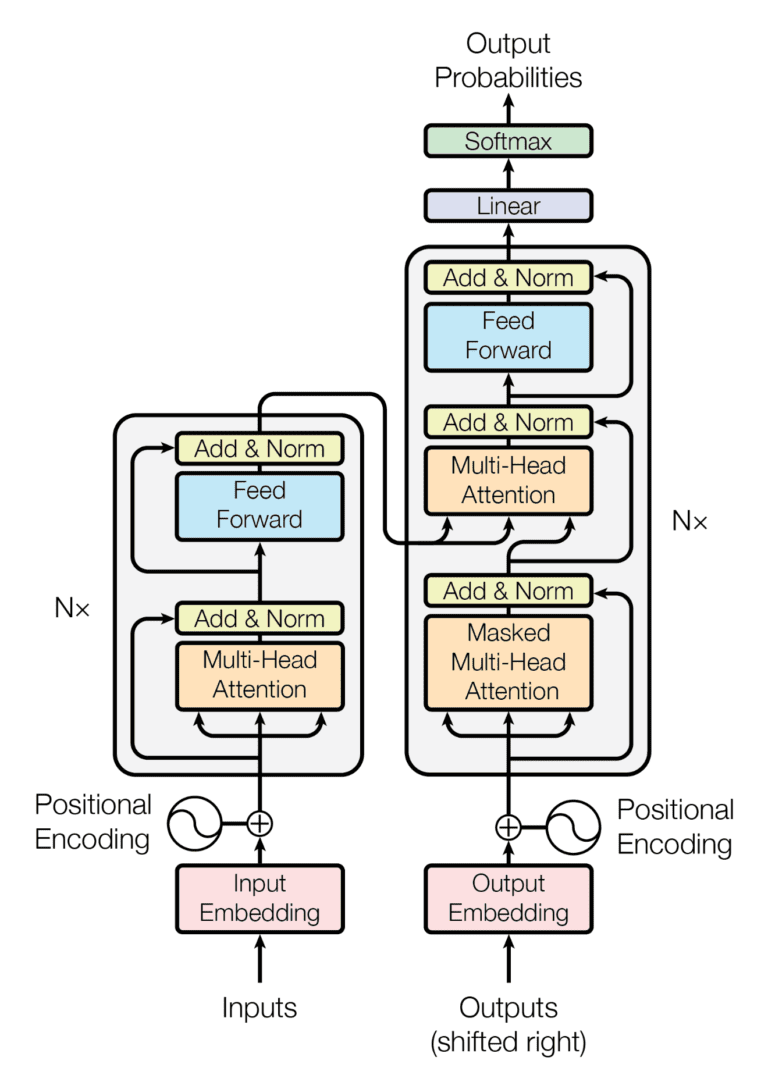

### Bert
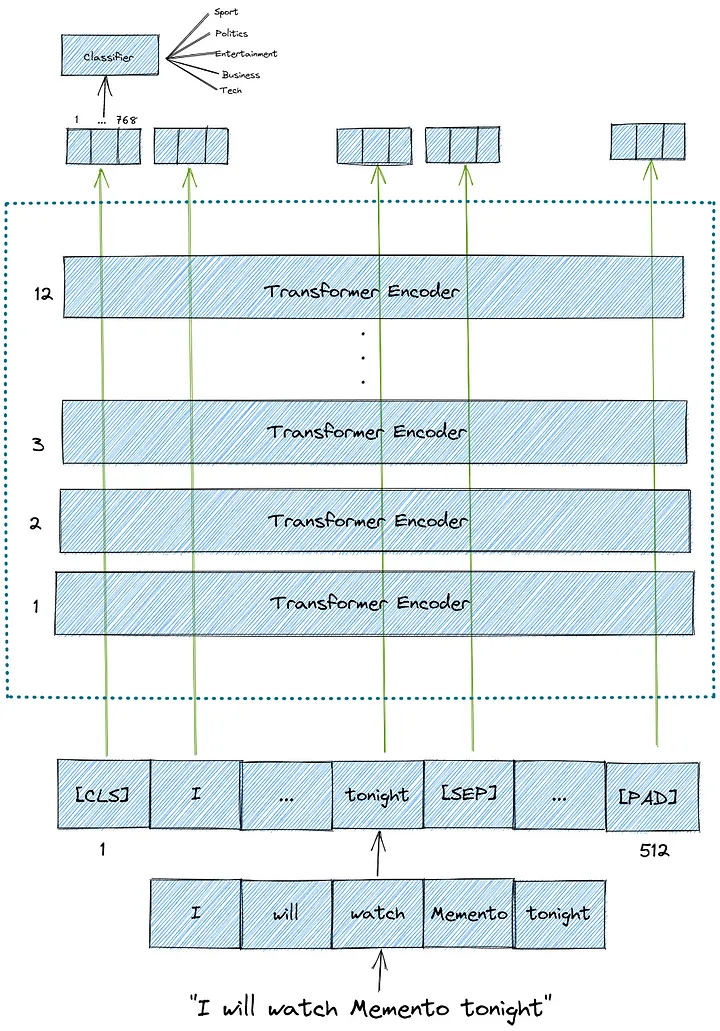

credits: https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
- Bert only uses the encoder

## Implementation
- Now lets get started implementing our project
- Here we use the huggingface transformers library and pytorch

In [ ]:
!pip install transformers
!pip install pandas as pd
!pip install numpy as np
!pip install torch
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=40a126d88f3ab0c93081487c4024dbb37c717d10f01d9eba307d8bc2c11ae766
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [ ]:
!pip install accelerate -U
!pip install --upgrade transformers
!pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving halloween_movies.csv to halloween_movies.csv


In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding, TrainingArguments, AutoModelForSequenceClassification, Trainer
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import torch
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from tqdm import tqdm_notebook as tqdm
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
class CustomDataset(Dataset):
    def __init__(
            self,
            encodings,
            labels,):

        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])

        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
def train_test_val_split(inputs, labels, ratios):
    train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, train_size=ratios[0])
    ratios[1] = ratios[1]/(1-ratios[0])
    ratios[2] = ratios[2]/(1-ratios[0])
    test_inputs, val_inputs, test_labels, val_labels = train_test_split(test_inputs, test_labels,train_size = ratios[1])

    return train_inputs, train_labels, test_inputs, test_labels, val_inputs, val_labels

In [ ]:
def preprocess(dataframe, max_size, ratios, tokenizer):
    inputs = dataframe["Full Description"].tolist()[:max_size]
    labels = dataframe["Labels"].tolist()[:max_size]

    train_inputs, train_labels, test_inputs, test_labels, val_inputs, val_labels = train_test_val_split(inputs,labels, ratios)

    return (
        tokenizer(train_inputs, truncation=True),
        train_labels,
        tokenizer(test_inputs, truncation=True),
        test_labels,
        tokenizer(val_inputs, truncation=True),
        val_labels
    )

In [ ]:
def load_data(file_name):
    data = pd.read_csv(file_name)

    return data

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    report = metrics.classification_report(y_pred=predictions, y_true=labels, digits=4, output_dict=True)

    return {
        "f1": report["macro avg"]["f1-score"],
        "accuracy": report["accuracy"]
    }

In [ ]:
def evaluate(trainer, test_dataset):
  outputs = trainer.predict(test_dataset)
  pred = np.argmax(outputs.predictions,axis=1)
  labels = outputs.label_ids
  cm = confusion_matrix(labels,pred)

  sn.set(font_scale=1)
  sn.heatmap(cm, annot=True, annot_kws={"size": 16})

  plt.show()

  print(f"Metrics: {outputs.metrics}")




In [ ]:
data = load_data("halloween_movies.csv")

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

train_embeddings, train_labels, test_embeddings, test_labels, val_embeddings, val_labels = preprocess(data,8000,[0.6,0.2,0.2],tokenizer)

train_dataset = CustomDataset(train_embeddings, train_labels)
test_dataset = CustomDataset(test_embeddings, test_labels)
val_dataset = CustomDataset(val_embeddings, val_labels)

print(f'The first element in each dataset')
print(train_dataset[0], end='\n\n')
print(test_dataset[0], end='\n\n')
print(val_dataset[0], end='\n\n')

print(f'Length of train dataset: {len(train_dataset)}')
print(f'Length of test dataset: {len(test_dataset)}')
print(f'Length of val dataset: {len(val_dataset)}')

The first element in each dataset
{'input_ids': tensor([  101,  1000,  3280,  2226, 21442,  6895,   999,  1000,  1006,  2289,
         1007,  3280,  2226, 21442,  6895,  1012,  9765, 16655,  8668, 10093,
         6777,  5562,  2063,  5447, 23565, 15581,  4402,  2139,  2474,  8668,
        17151, 21493,  9013,  2638,  1005,  4067,  2643,  2017,  1005,  2128,
         2182,  1005,  1012,  1048,  1005, 15760,  9765,  8750,  2063, 11968,
         4388, 16183,  3567,  4014,  1010, 21864,  9765, 17151,  5332,  4895,
         4078, 25527,  4031, 26744,  1010,  3802, 28105,  2063,  2139, 14289,
         2483,  3393,  2676, 17419,  6633, 13578,  2289, 18414,  2015, 28940,
         1005,  4372,  2262,  7505,  2694,  2050,  1012, 24209,  4017,  2890,
         2711, 12032,  7616,  2777,  6528,  2102,  4372,  3350,  3393,  3126,
         5848,  1040,  1005,  2552, 11236,  1010,  3231,  4765,  3393,  3126,
        12411,  2015,  2139,  2474, 16360,  8445,  2666,  3802,  1010,  7505,
        24826,  

In [ ]:
# Our model and other stuff!!
id2label = {0: "Normal", 1: "Halloween"}
label2id = {"Normal": 0, "Halloween": 1}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

data_collater = DataCollatorWithPadding(tokenizer=tokenizer)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Make sure cuda is set up
torch.cuda.is_available()

True

In [ ]:
# TIME TO TRAIN IT!!!!
training_args = TrainingArguments(
    disable_tqdm=True,
    output_dir="movie_classification",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collater,
    compute_metrics=compute_metrics,
)

trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.3026, 'learning_rate': 1e-05, 'epoch': 1.0}
{'eval_loss': 0.21997018158435822, 'eval_f1': 0.9212469237079574, 'eval_accuracy': 0.92125, 'eval_runtime': 16.4115, 'eval_samples_per_second': 97.493, 'eval_steps_per_second': 6.093, 'epoch': 1.0}
{'loss': 0.1613, 'learning_rate': 0.0, 'epoch': 2.0}
{'eval_loss': 0.21202558279037476, 'eval_f1': 0.9324391952757481, 'eval_accuracy': 0.9325, 'eval_runtime': 16.5676, 'eval_samples_per_second': 96.574, 'eval_steps_per_second': 6.036, 'epoch': 2.0}
{'train_runtime': 329.8439, 'train_samples_per_second': 29.105, 'train_steps_per_second': 1.819, 'train_loss': 0.2319809913635254, 'epoch': 2.0}


TrainOutput(global_step=600, training_loss=0.2319809913635254, metrics={'train_runtime': 329.8439, 'train_samples_per_second': 29.105, 'train_steps_per_second': 1.819, 'train_loss': 0.2319809913635254, 'epoch': 2.0})

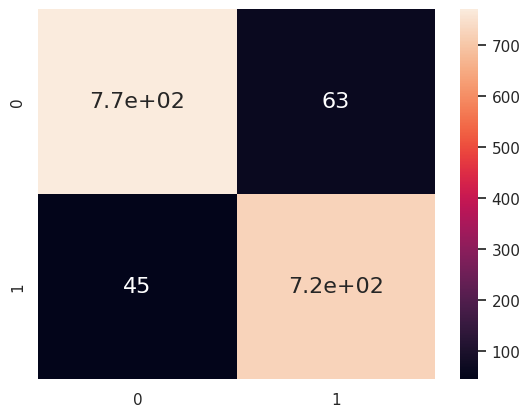

Metrics: {'test_loss': 0.21202558279037476, 'test_f1': 0.9324391952757481, 'test_accuracy': 0.9325, 'test_runtime': 16.2819, 'test_samples_per_second': 98.269, 'test_steps_per_second': 6.142}


In [ ]:
evaluate(trainer,test_dataset)

In [ ]:
# TIME FOR SOME INFERENCE!!!
device = torch.device('cuda')
model.to(device)

text = "A Quiet Place(2018) A family struggles for survival in a world where most humans have been killed by blind but noise-sensitive creatures. They are forced to communicate in sign language to keep the creatures at bay"
inputs = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
  logits = model(**inputs).logits
  predicted_class_id = logits.argmax().item()
  print(model.config.id2label[predicted_class_id])

Halloween
